# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [209]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [211]:
# Importing the file porter_data_1.csv
portedf = pd.read_csv("porter_data_1.csv")

In [213]:
portedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

In [215]:
portedf.describe()

market_id  store_primary_category  order_protocol    total_items  \
count  175777.000000           175777.000000   175777.000000  175777.000000   
mean        2.743726               35.887949        2.911752       3.204976   
std         1.330963               20.728254        1.513128       2.674055   
min         1.000000                0.000000        1.000000       1.000000   
25%         2.000000               18.000000        1.000000       2.000000   
50%         2.000000               38.000000        3.000000       3.000000   
75%         4.000000               55.000000        4.000000       4.000000   
max         6.000000               72.000000        7.000000     411.000000   

            subtotal  num_distinct_items  min_item_price  max_item_price  \
count  175777.000000       175777.000000   175777.000000   175777.000000   
mean     2697.111147            2.675060      684.965433     1160.158616   
std      1828.554893            1.625681      519.882924      560.828571   
min         0.000000            1.000000      -86.000000        0.000000   
25%      1412.000000            1.000000      299.000000      799.000000   
50%      2224.000000            2.000000      595.000000     1095.000000   
75%      3410.000000            3.000000      942.000000     1395.000000   
max     26800.000000           20.000000    14700.000000    14700.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          175777.000000       175777.000000             175777.000000   
mean               44.918664           41.861381                 58.230115   
std                34.544724           32.168505                 52.731043   
min                -4.000000           -5.000000                 -6.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           35.000000                 41.000000   
75%                66.000000           63.000000                 85.000000   
max               171.000000          154.000000                285.000000   

            distance  
count  175777.000000  
mean       21.843090  
std         8.748712  
min         0.000000  
25%        15.360000  
50%        21.760000  
75%        28.120000  
max        83.520000

In [217]:
portedf.shape

(175777, 14)

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [219]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
portedf.created_at = pd.to_datetime(portedf.created_at)
portedf.actual_delivery_time = pd.to_datetime(portedf.actual_delivery_time)

In [221]:
portedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

In [223]:
portedf.head(20)

market_id          created_at actual_delivery_time  \
0         1.0 2015-02-06 22:24:17  2015-02-06 23:11:17   
1         2.0 2015-02-10 21:49:25  2015-02-10 22:33:25   
2         2.0 2015-02-16 00:11:35  2015-02-16 01:06:35   
3         1.0 2015-02-12 03:36:46  2015-02-12 04:35:46   
4         1.0 2015-01-27 02:12:36  2015-01-27 02:58:36   
5         1.0 2015-02-06 00:42:42  2015-02-06 01:38:42   
6         1.0 2015-02-08 02:04:17  2015-02-08 03:07:17   
7         1.0 2015-01-31 04:35:54  2015-01-31 05:33:54   
8         1.0 2015-01-31 02:21:23  2015-01-31 02:58:23   
9         1.0 2015-01-31 23:45:12  2015-02-01 00:26:12   
10        1.0 2015-02-17 03:13:20  2015-02-17 04:08:20   
11        1.0 2015-02-15 01:26:20  2015-02-15 02:11:20   
12        1.0 2015-02-02 05:27:49  2015-02-02 06:54:49   
13        1.0 2015-02-16 02:21:20  2015-02-16 03:28:20   
14        1.0 2015-02-13 01:01:58  2015-02-13 01:44:58   
15        1.0 2015-01-24 02:01:20  2015-01-24 02:43:20   
16        1.0 2015-02-10 04:36:39  2015-02-10 05:34:39   
17        1.0 2015-01-26 02:09:48  2015-01-26 03:04:48   
18        1.0 2015-02-07 01:44:26  2015-02-07 02:28:26   
19        1.0 2015-01-30 01:43:09  2015-01-30 02:29:09   

    store_primary_category  order_protocol  total_items  subtotal  \
0                        4             1.0            4      3441   
1                       46             2.0            1      1900   
2                       36             3.0            4      4771   
3                       38             1.0            1      1525   
4                       38             1.0            2      3620   
5                       38             1.0            3      4475   
6                       38             1.0            3      4375   
7                       38             1.0            2      3150   
8                       46             1.0            2       950   
9                       46             1.0            5      1285   
10                      38             1.0            4      5800   
11                      38             1.0            2      2800   
12                      38             1.0            7     14900   
13                      38             1.0            3      3400   
14                      38             1.0            3      3800   
15                      38             1.0            1      1800   
16                      38             1.0            4      5800   
17                      38             1.0            3      3800   
18                      38             1.0            1      1800   
19                      38             1.0            2      2700   

    num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                    4             557            1239                   33.0   
1                    1            1400            1400                    1.0   
2                    3             820            1604                    8.0   
3                    1            1525            1525                    5.0   
4                    2            1425            2195                    5.0   
5                    3             925            1825                    4.0   
6                    3            1325            1625                    6.0   
7                    2            1425            1725                    4.0   
8                    2             150             700                   24.0   
9                    3             150             400                   12.0   
10                   4             700            2000                   19.0   
11                   2            1200            1600                   21.0   
12                   5            1200            3900                    8.0   
13                   3            1400            2100                   22.0   
14                   3             700            1600                   16.0   
15                   1            1800 

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [225]:
# Convert categorical features to category type
categorycols = ['market_id','store_primary_category','order_protocol']

portedf[categorycols] = portedf[categorycols].astype("category")

portedf.dtypes

market_id                         category
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category            category
order_protocol                    category
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers              float64
total_busy_dashers                 float64
total_outstanding_orders           float64
distance                           float64
dtype: object

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [227]:
# Calculate time taken in minutes

portedf["time_taken_minutes"] = (portedf["actual_delivery_time"] - portedf["created_at"]).dt.total_seconds() / 60


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [229]:
# Extract the hour and day of week from the 'created_at' timestamp

portedf["created_hour"] = portedf["created_at"].dt.hour

portedf["created_day_of_week"] = portedf["created_at"].dt.dayofweek

# Create a categorical feature 'isWeekend'
portedf["isWeekend"] = portedf["created_at"].dt.dayofweek >= 5


In [231]:
portedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

In [233]:
# Drop unnecessary columns
#As we have already got the data derived from these for other columns we are not sure at this point
columns_to_drop = ["created_at", "actual_delivery_time"]

portedf = portedf.drop(columns=columns_to_drop)


#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [235]:
# Define target variable (y) and features (X)

y = portedf["time_taken_minutes"]

X = portedf.drop(columns=["time_taken_minutes"])


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [237]:
# Split data into training and testing sets
#80-20 split using SKLearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140621, 15)
(35156, 15)
(140621,)
(35156,)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [239]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 42111 to 38408
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 140621 non-null  category
 1   store_primary_category    140621 non-null  category
 2   order_protocol            140621 non-null  category
 3   total_items               140621 non-null  int64   
 4   subtotal                  140621 non-null  int64   
 5   num_distinct_items        140621 non-null  int64   
 6   min_item_price            140621 non-null  int64   
 7   max_item_price            140621 non-null  int64   
 8   total_onshift_dashers     140621 non-null  float64 
 9   total_busy_dashers        140621 non-null  float64 
 10  total_outstanding_orders  140621 non-null  float64 
 11  distance                  140621 non-null  float64 
 12  created_hour              140621 non-null  int32   
 13  created_day_of_week       14062

In [241]:
# Define numerical and categorical columns for easy EDA and data manipulation

categorical_cols = ["market_id", "store_primary_category", "order_protocol", "isWeekend"]

numerical_cols = ["total_items", "subtotal", "num_distinct_items", "min_item_price", "max_item_price", "total_onshift_dashers", 
                  "total_busy_dashers", "total_outstanding_orders", "distance", "created_hour", "created_day_of_week"]


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

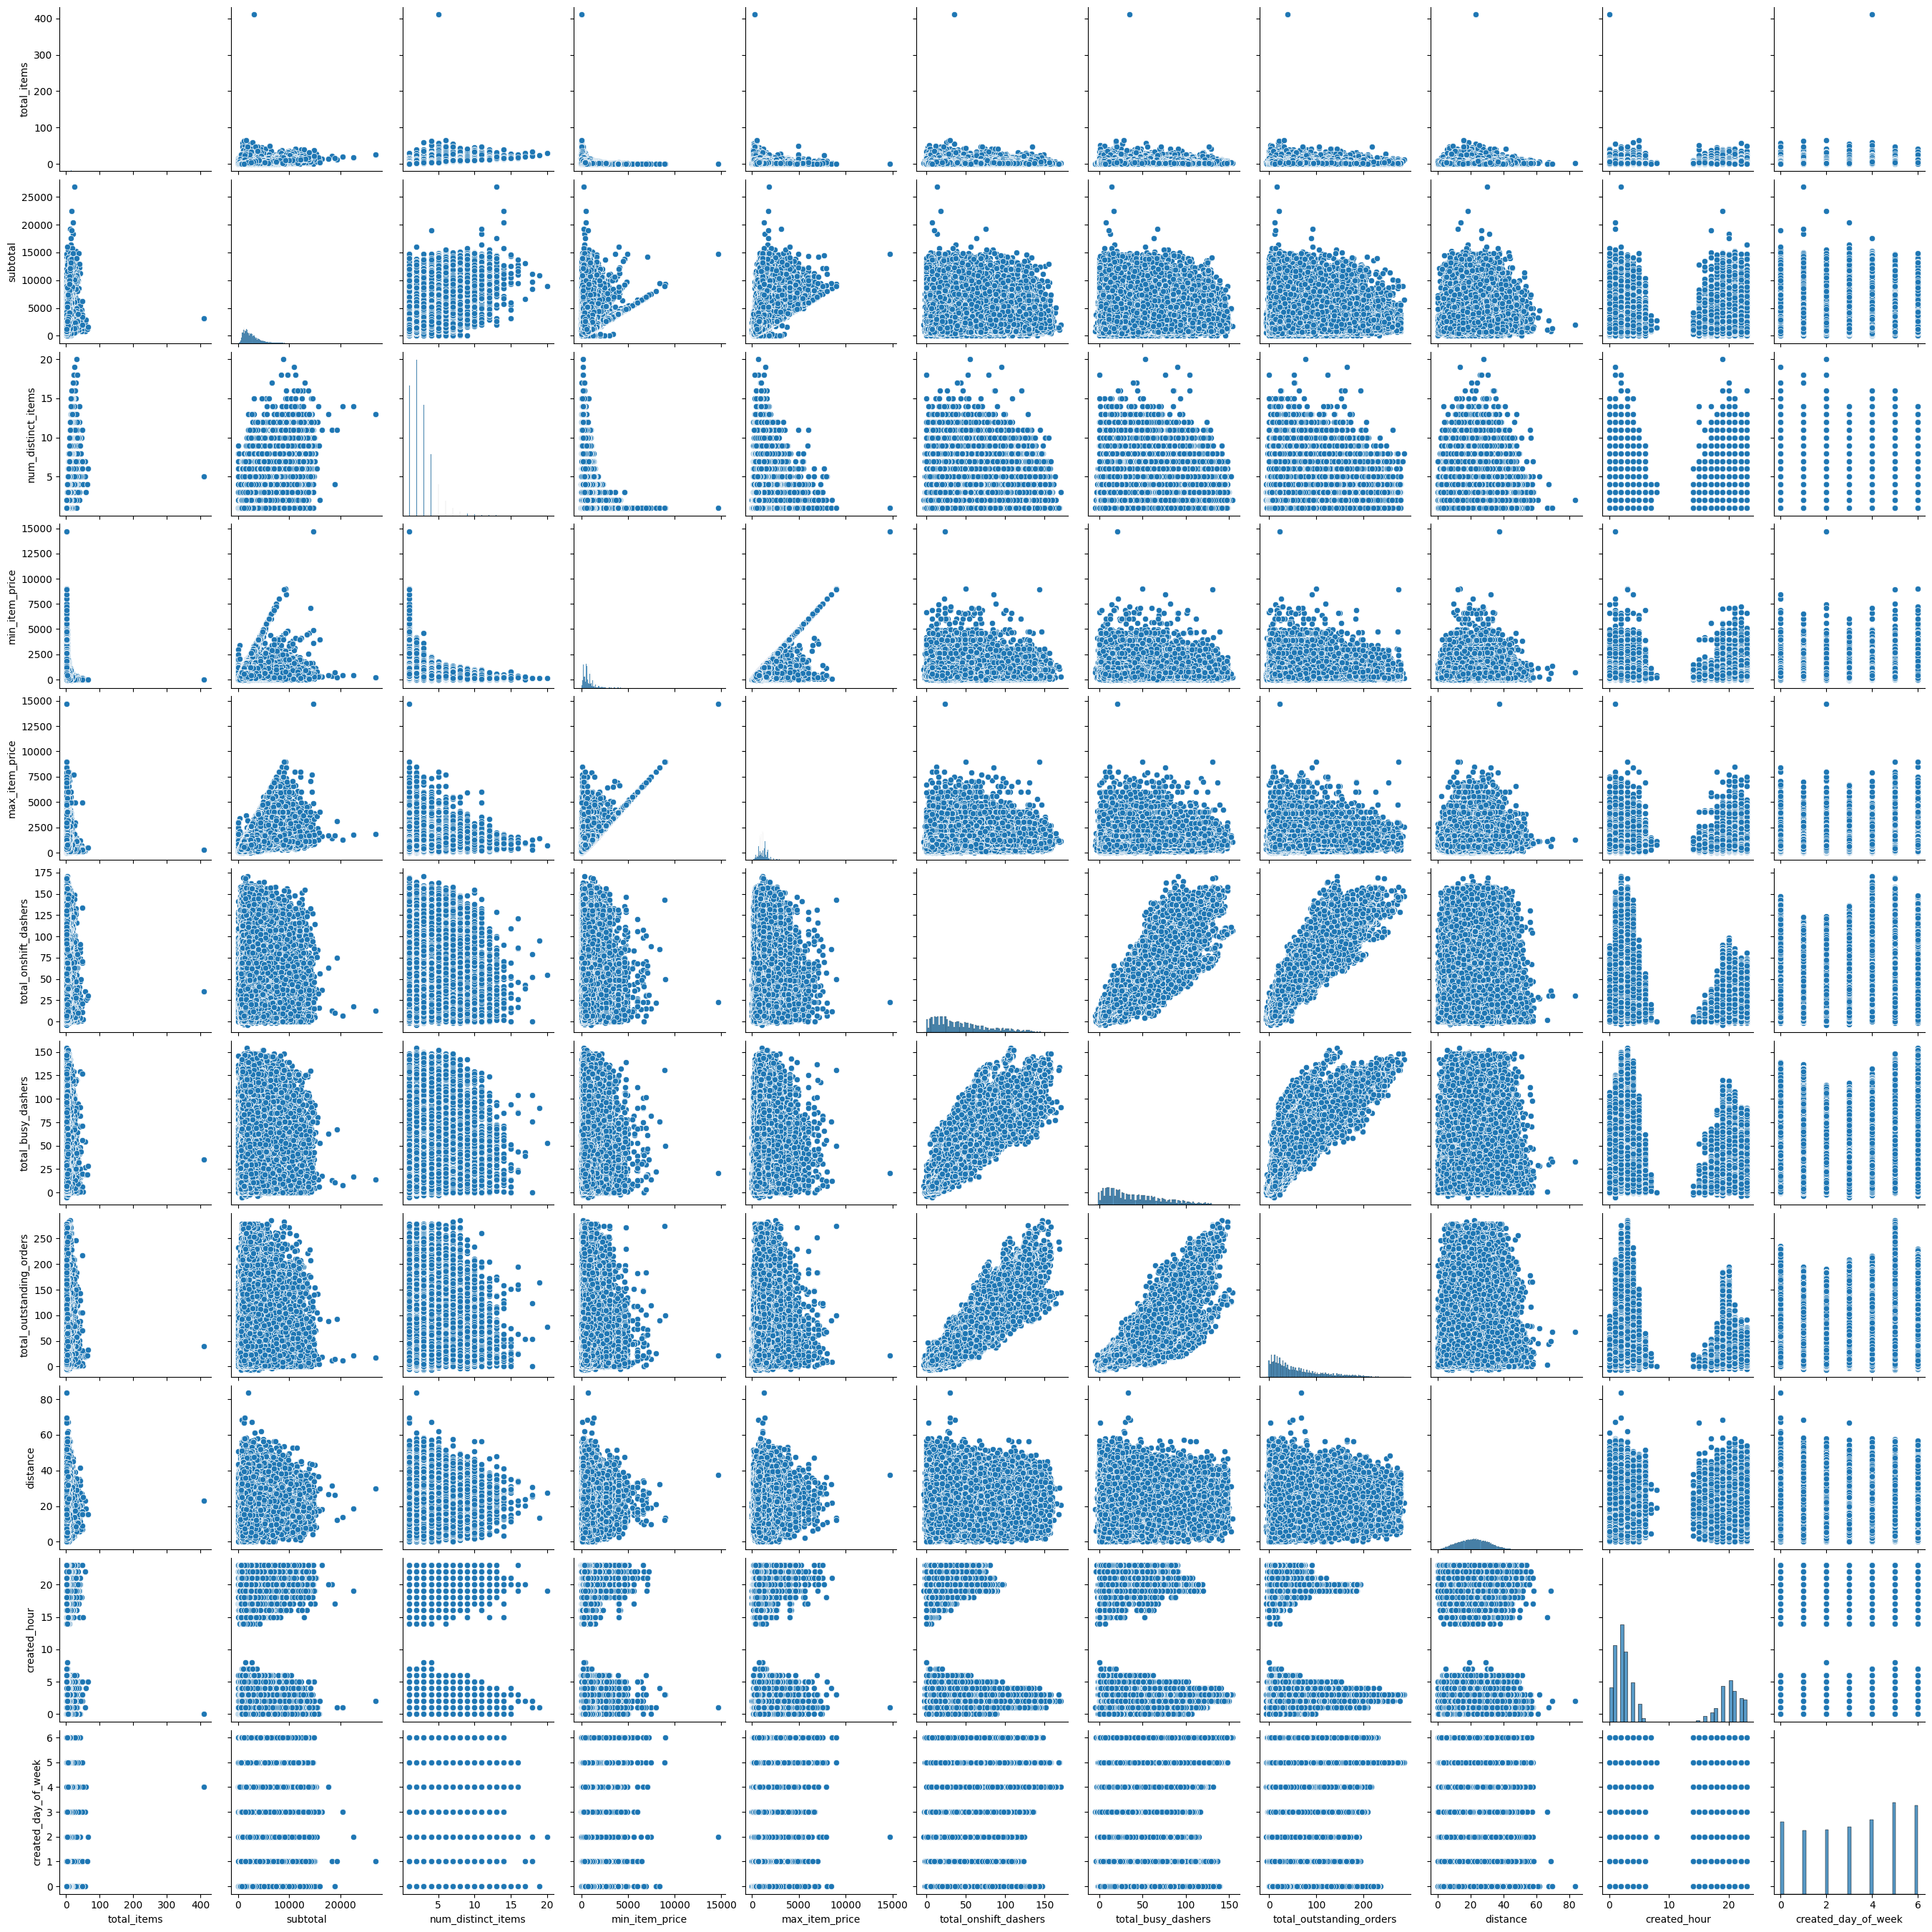

In [243]:
# Plot distributions for all numerical columns
sns.pairplot(X_train[numerical_cols])

#if we look at the diagonal plots lof of variables are Right-skewed - subtotal, num_distinct_itmes, min & max item price, few more are there


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

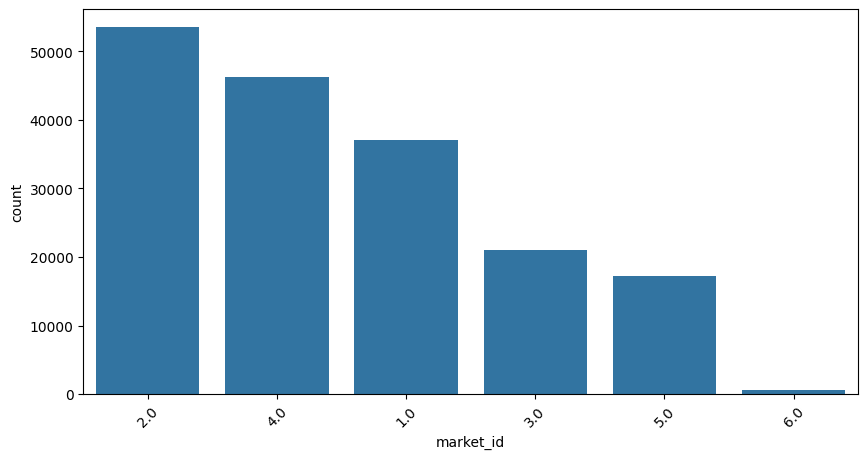

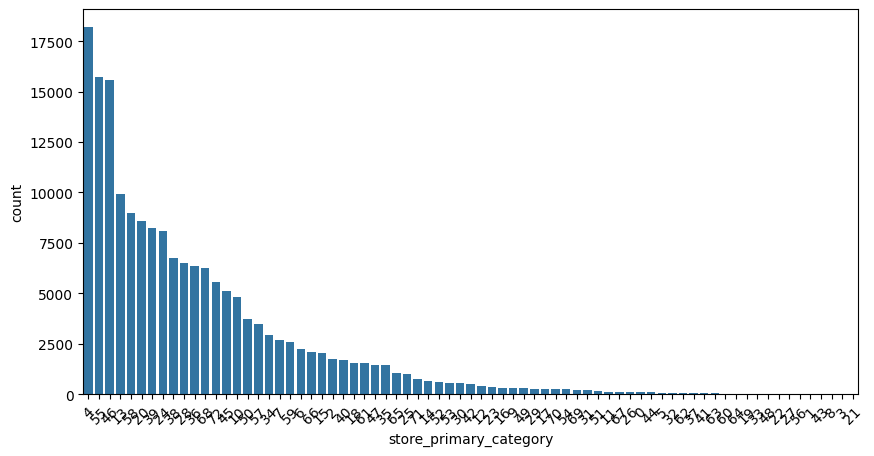

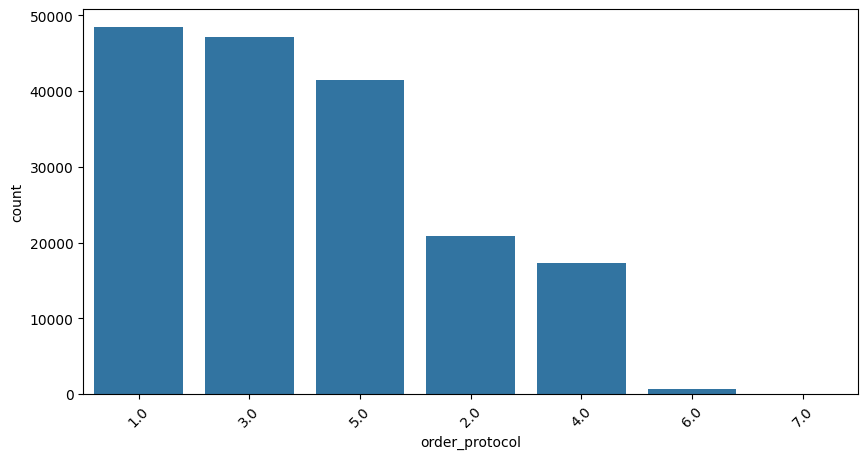

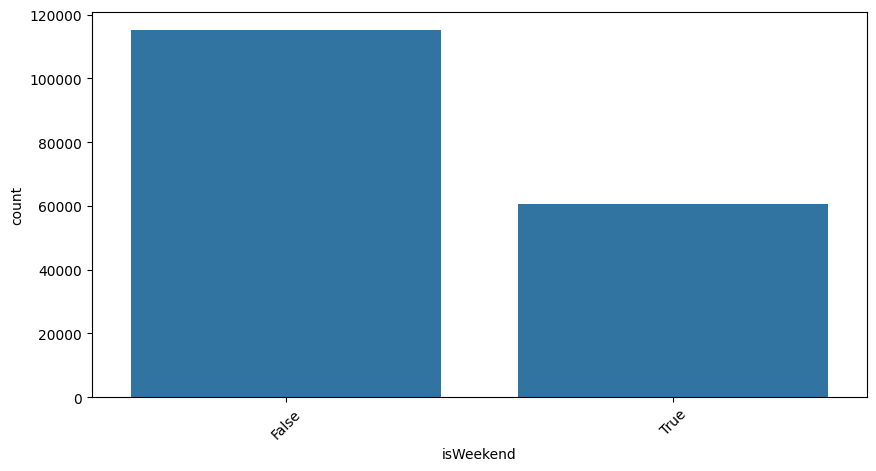

In [245]:
# Distribution of categorical columns
for col in categorical_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(x=portedf[col], order=portedf[col].value_counts().index)
    plt.xticks(rotation=45)

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

<Axes: xlabel='time_taken_minutes', ylabel='Count'>

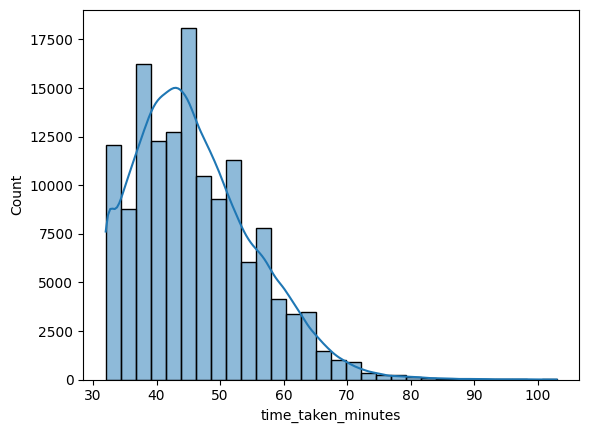

In [247]:
# Distribution of time_taken

#Data is skewed (right-skewed) - pick to the left with a long tail on the right
sns.histplot(y_train, kde=True, bins=30)


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

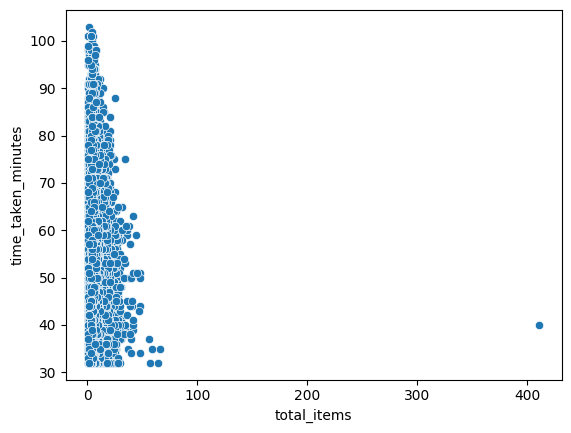

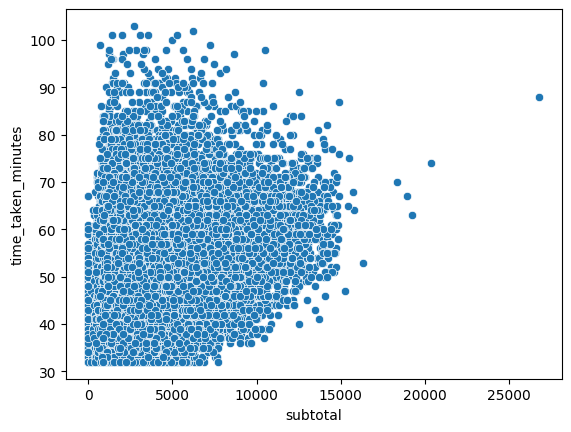

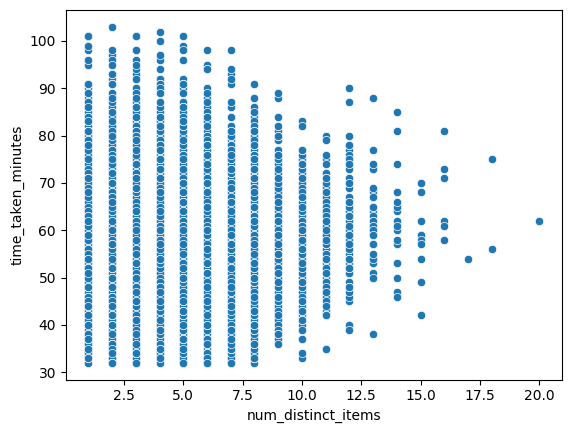

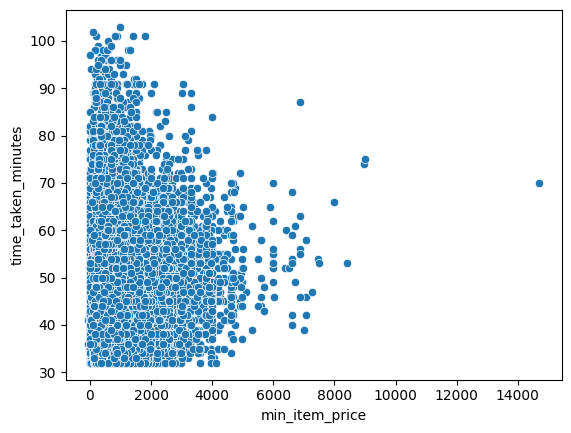

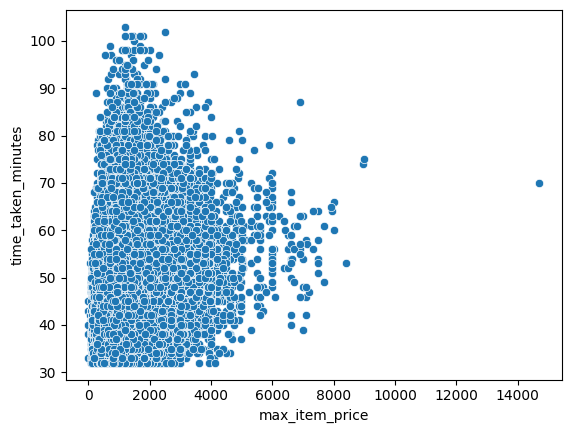

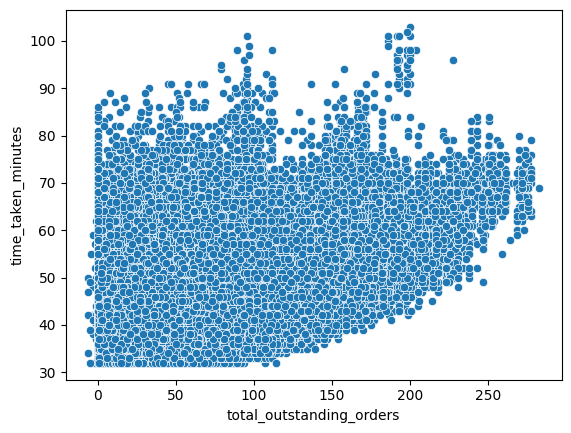

In [249]:
# Scatter plot to visualise the relationship between time_taken and other features

# Scatter plot - to compare numerical featrues with time take
for col in numerical_cols:
    sns.scatterplot(x=X_train[col], y=y_train)
    plt.show()



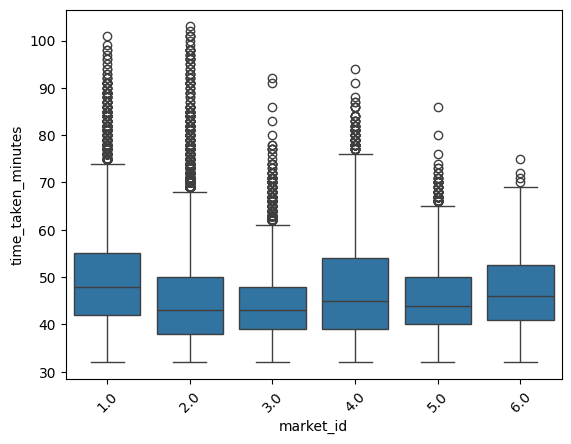

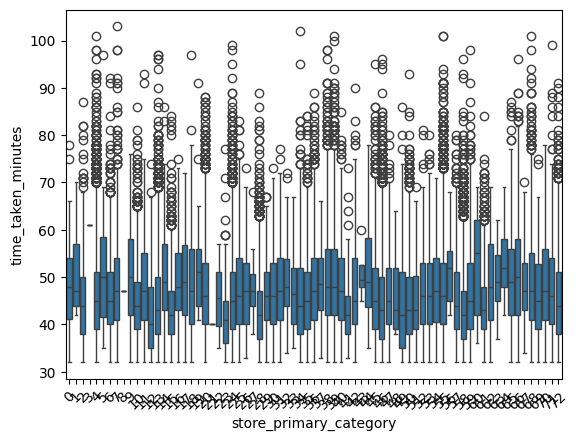

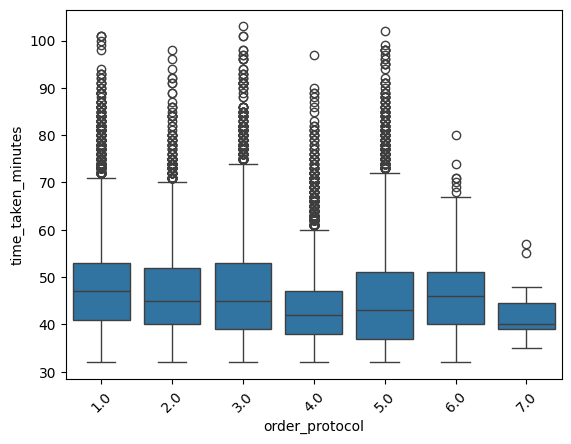

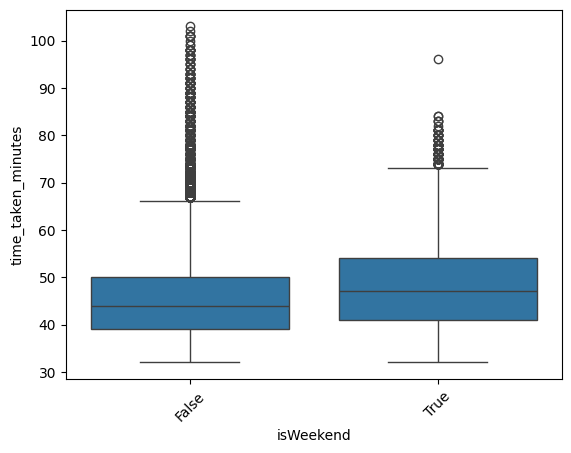

In [251]:
# Box plots for categorical columns vs time taken
for col in categorical_cols:
    sns.boxplot(x=X_train[col], y=y_train)
    plt.xticks(rotation=45)
    plt.show()

<Axes: xlabel='created_hour', ylabel='time_taken_minutes'>

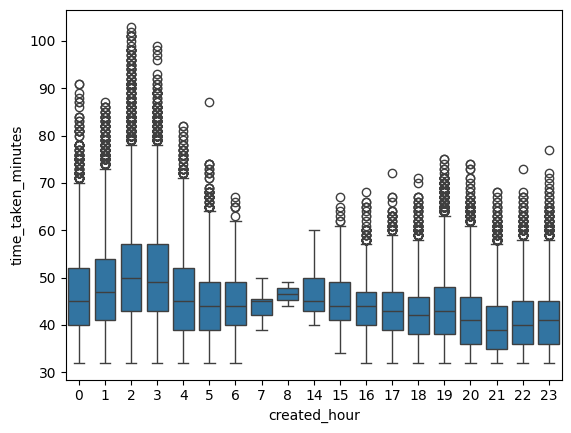

In [253]:
# Show the distribution of time_taken for different hours

sns.boxplot(x=X_train["created_hour"], y=y_train)

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

In [255]:
# Plot the heatmap of the correlation matrix

plt.figure(figsize = (16,10))
sns.heatmap(portedf.corr(),annot = True, cmap = "YlGnBu")
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [257]:
# Drop 3-5 weakly correlated columns from training dataset

# Some columns are having very week correlation with target variable - Order protocol, MarketID, store primary category, min item price. 
# Some others are low as well but keeping those for now - in case it impacts other variables

#porterdf.drop(columns=["order_protocol", "market_id", "store_primary_category", "min_item_price"], inplace=True)
X_train.drop(columns=["order_protocol", "market_id", "store_primary_category", "min_item_price"], inplace=True)


In [259]:
X_train.shape

(140621, 11)

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

In [261]:
categorical_cols = ["isWeekend"]

numerical_cols = ["total_items", "subtotal", "num_distinct_items", "max_item_price", "total_onshift_dashers", 
                  "total_busy_dashers", "total_outstanding_orders", "distance", "created_hour", "created_day_of_week"]

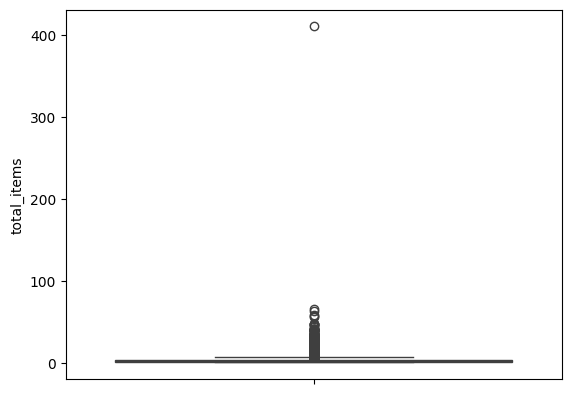

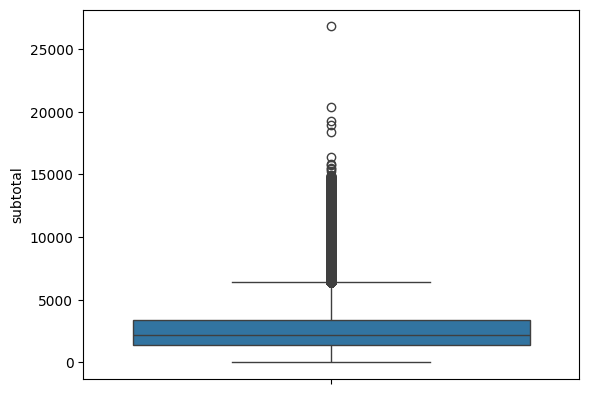

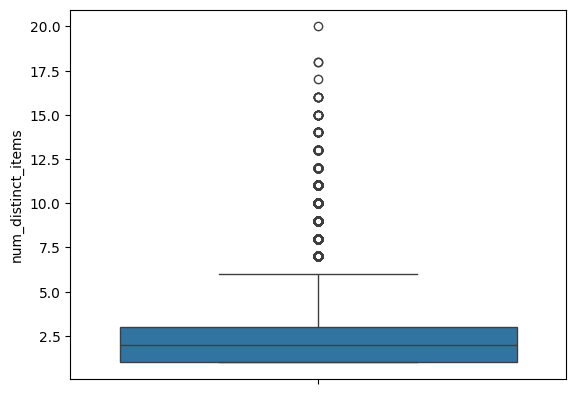

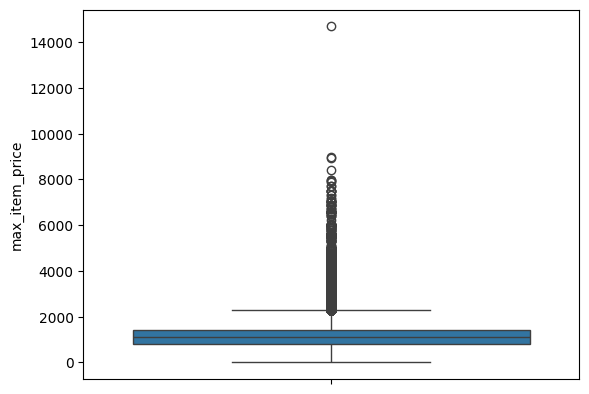

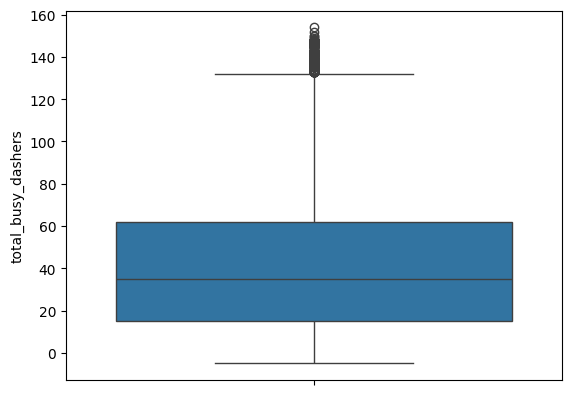

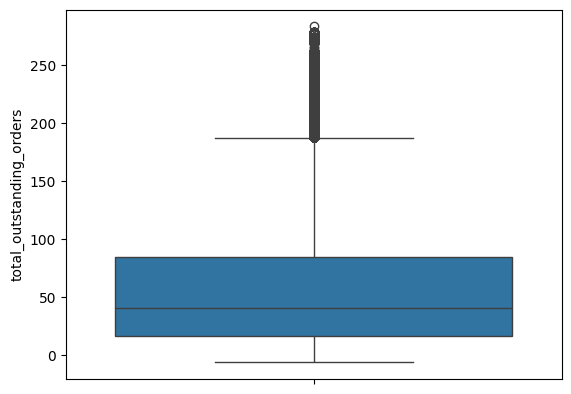

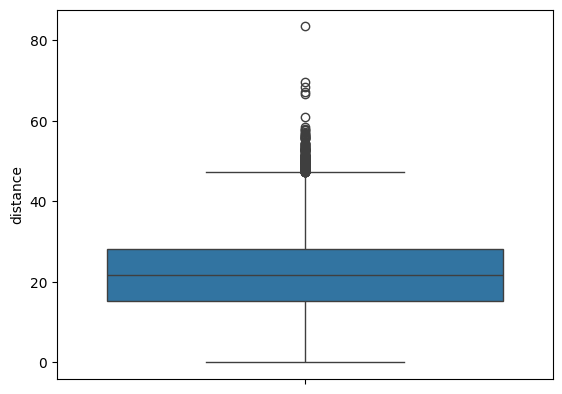

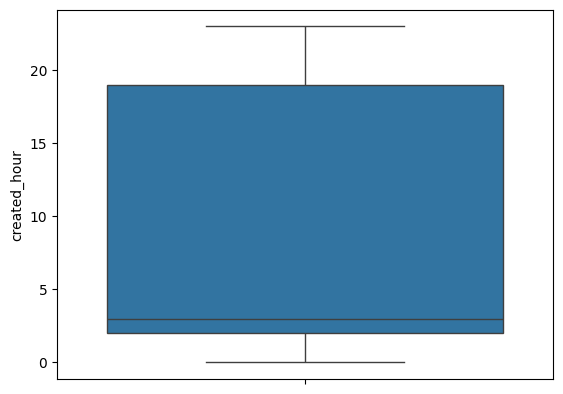

In [263]:
# Boxplot for time_taken

for col in numerical_cols:
    sns.boxplot(y=X_train[col])
    plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [265]:
#Handle Outliers

#Handle Subtotal Outliers - This is just logic acutaion implimentation is on next code block
Q1 = X_train["subtotal"].quantile(0.25)
Q3 = X_train["subtotal"].quantile(0.75)

IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

print(upper_bound)
print(X_train.shape)

mask = (X_train["subtotal"] >= lower_bound) & (X_train["subtotal"] <= upper_bound)

X_train_filtered = X_train[mask]
y_train_filtered = y_train[mask]

print(X_train_filtered.shape)
print(y_train_filtered.shape)


6395.0
(140621, 11)
(134074, 11)
(134074,)


In [269]:
#Handle rest of the outliers by combining the logic

# All upper layer outliers should be removed after this

for col in numerical_cols:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR

    print(X_train.shape)
    
    mask = (X_train[col] >= lower_bound) & (X_train[col] <= upper_bound)
    
    X_train = X_train[mask]
    y_train = y_train[mask]
    
    print(X_train.shape)
    print(y_train.shape)

(140621, 11)
(133864, 11)
(133864,)
(133864, 11)
(129302, 11)
(129302,)
(129302, 11)
(128822, 11)
(128822,)
(128822, 11)
(124629, 11)
(124629,)
(124629, 11)
(123602, 11)
(123602,)
(123602, 11)
(123265, 11)
(123265,)
(123265, 11)
(119092, 11)
(119092,)
(119092, 11)
(118869, 11)
(118869,)
(118869, 11)
(118869, 11)
(118869,)
(118869, 11)
(118869, 11)
(118869,)


In [271]:
#Handle isWeekend categorical column

# Convert isWeekend from Boolean to Integer
X_train["isWeekend"] = X_train["isWeekend"].astype(int)

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [273]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35156 entries, 139667 to 98870
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   market_id                 35156 non-null  category
 1   store_primary_category    35156 non-null  category
 2   order_protocol            35156 non-null  category
 3   total_items               35156 non-null  int64   
 4   subtotal                  35156 non-null  int64   
 5   num_distinct_items        35156 non-null  int64   
 6   min_item_price            35156 non-null  int64   
 7   max_item_price            35156 non-null  int64   
 8   total_onshift_dashers     35156 non-null  float64 
 9   total_busy_dashers        35156 non-null  float64 
 10  total_outstanding_orders  35156 non-null  float64 
 11  distance                  35156 non-null  float64 
 12  created_hour              35156 non-null  int32   
 13  created_day_of_week       35156 non-null  int3

In [275]:
# Define numerical and categorical columns for easy EDA and data manipulation

categorical_cols = ["market_id", "store_primary_category", "order_protocol", "isWeekend"]

numerical_cols = ["total_items", "subtotal", "num_distinct_items", "min_item_price", "max_item_price", "total_onshift_dashers", 
                  "total_busy_dashers", "total_outstanding_orders", "distance", "created_hour", "created_day_of_week"]


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

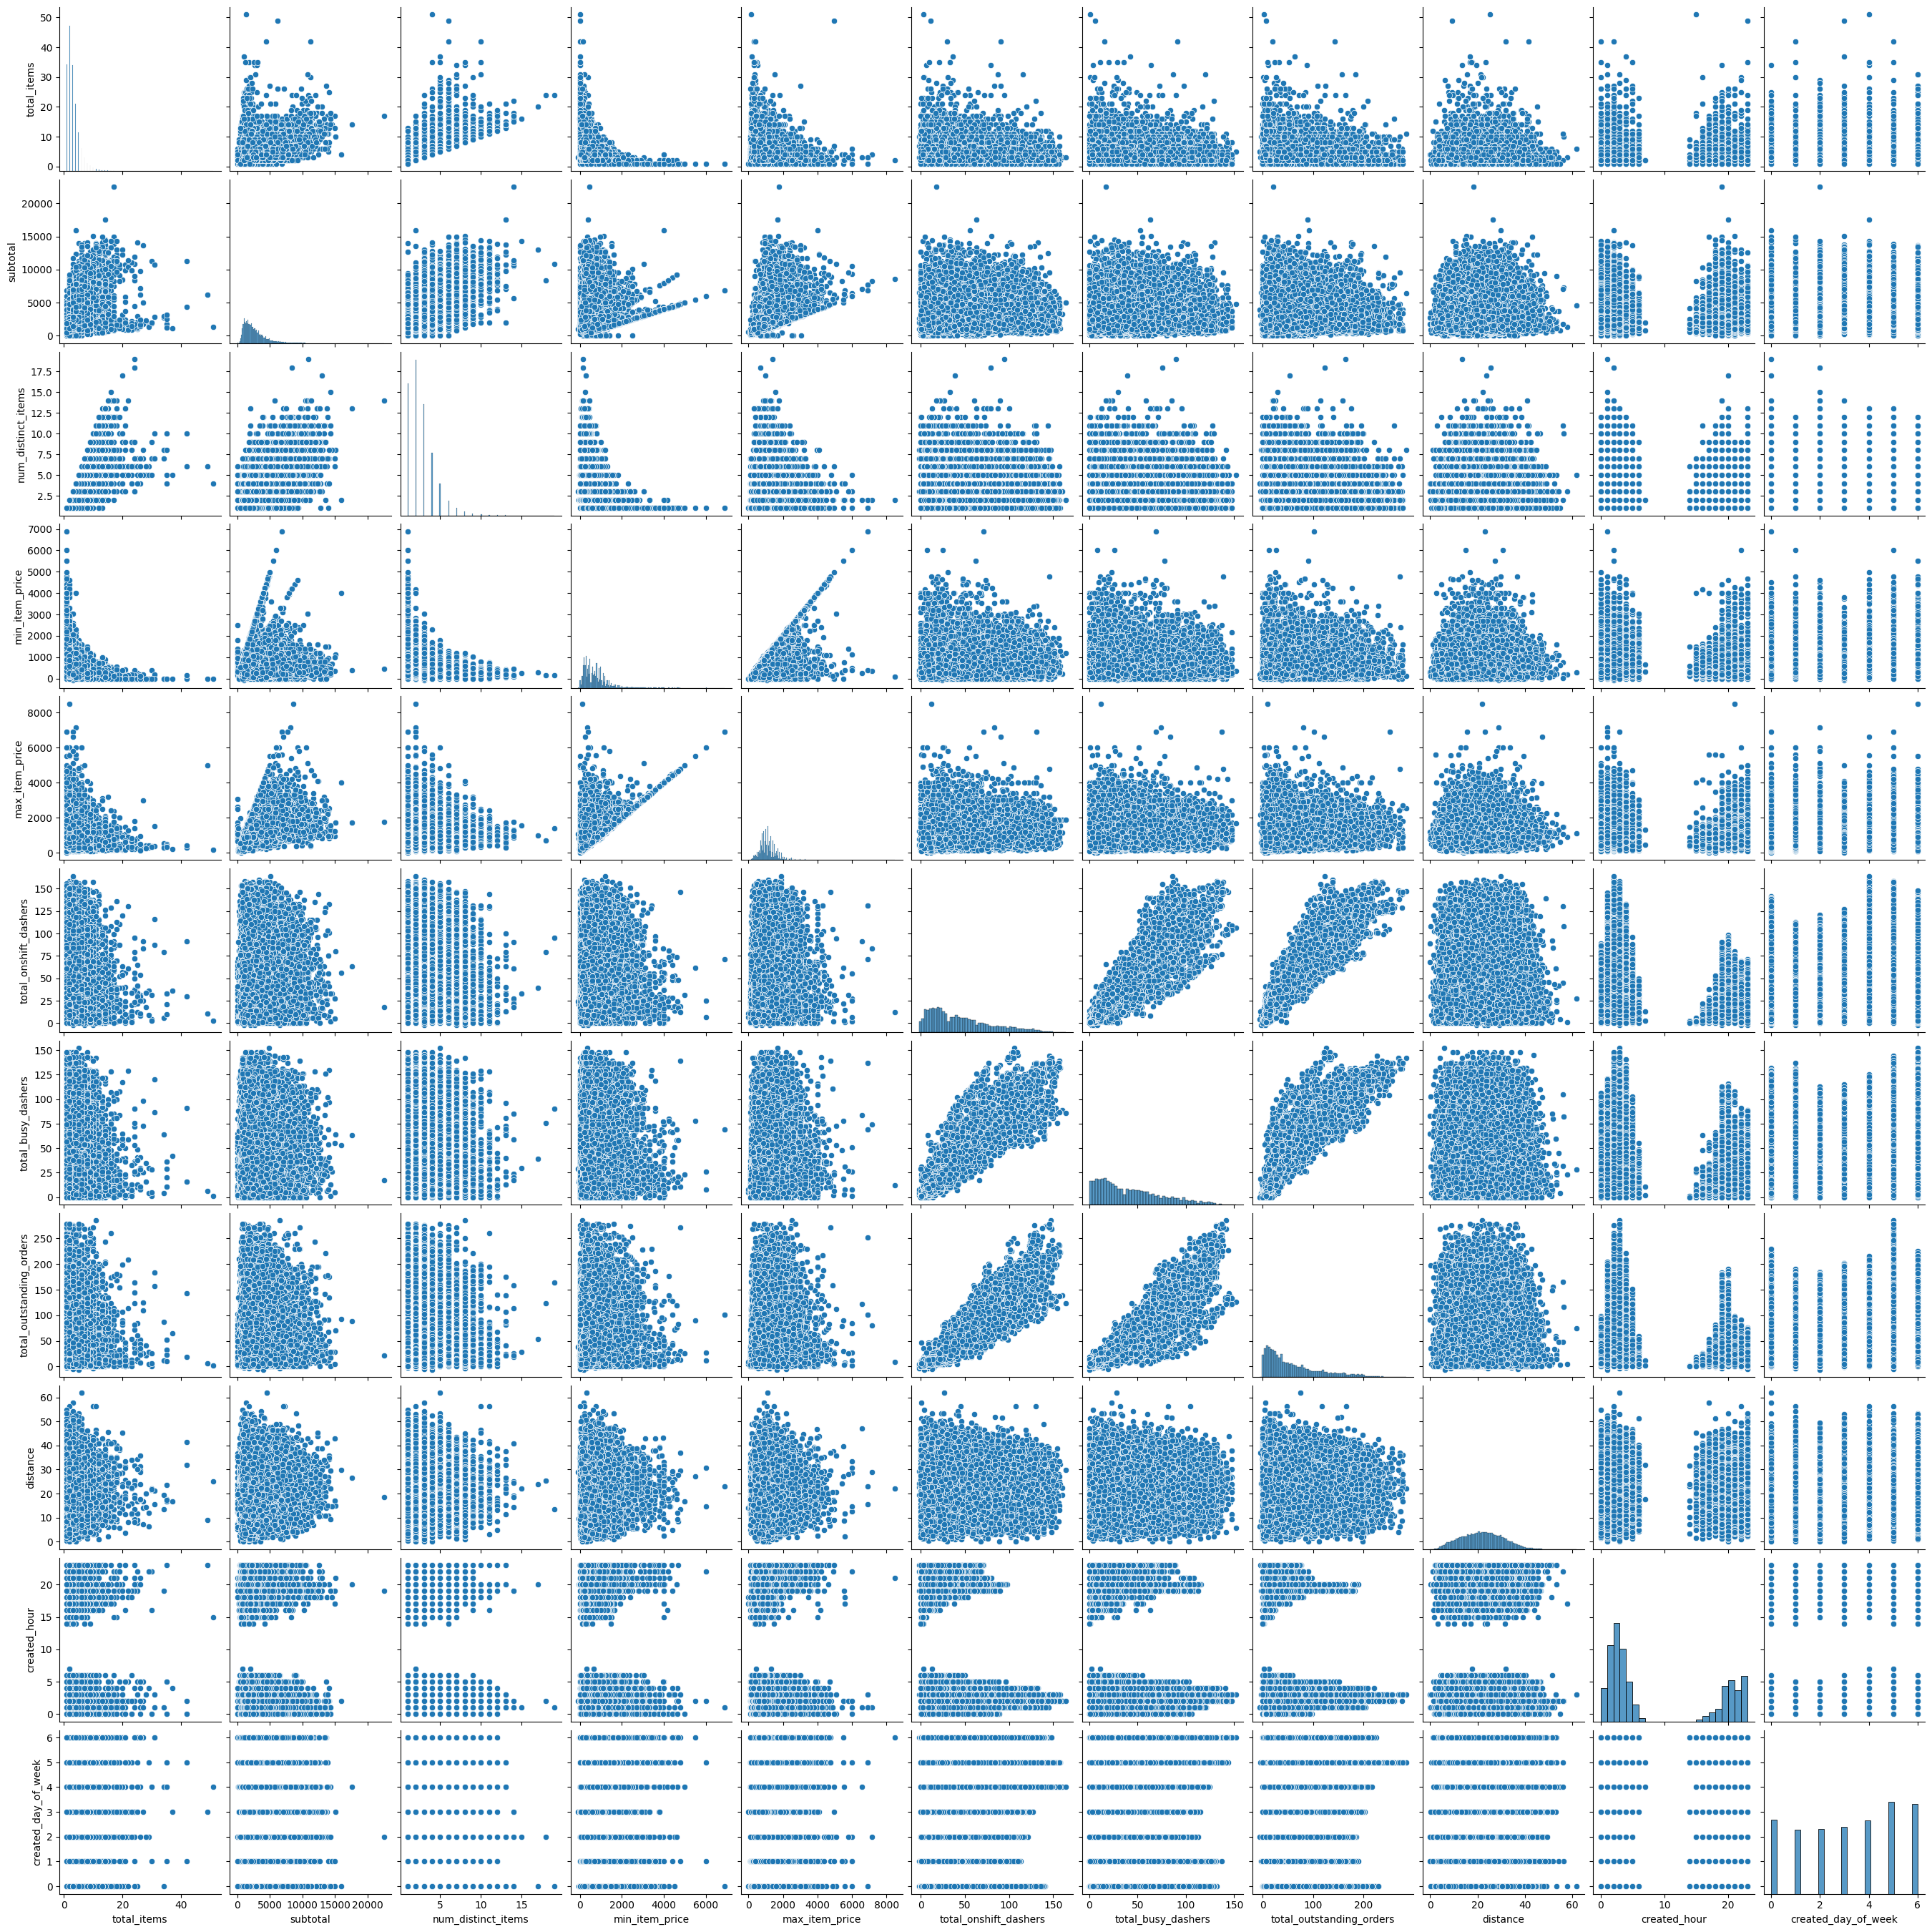

In [277]:
# Plot distributions for all numerical columns

sns.pairplot(X_test[numerical_cols])

#if we look at the diagonal plots lof of variables are Right-skewed - subtotal, num_distinct_itmes, min & max item price, few more are there



##### **4.1.2**
Check the distribution of categorical features

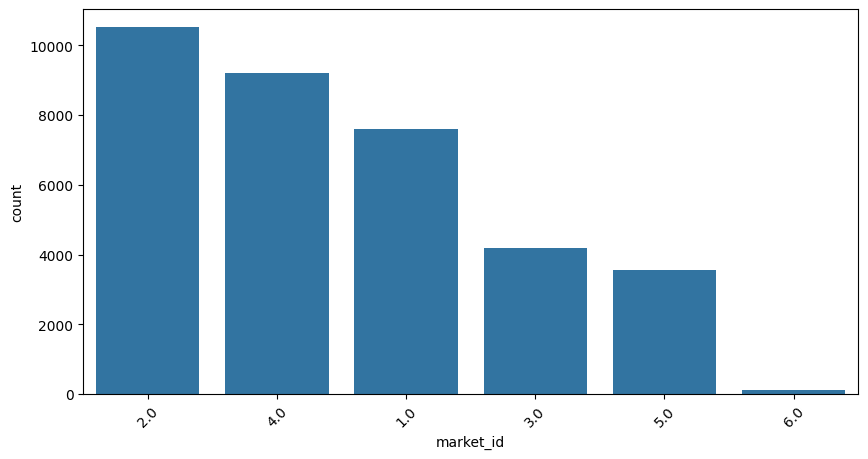

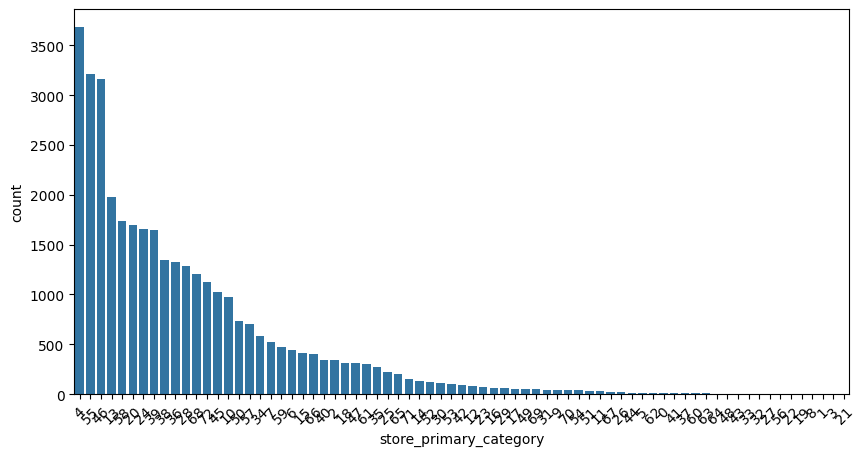

In [279]:
# Distribution of categorical columns
for col in categorical_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(x=X_test[col], order=X_test[col].value_counts().index)
    plt.xticks(rotation=45)


##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [281]:
# Distribution of time_taken

#Data is skewed (right-skewed) - pick to the left with a long tail on the right
sns.histplot(y_test, kde=True, bins=30)

<Axes: xlabel='time_taken_minutes', ylabel='Count'>

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

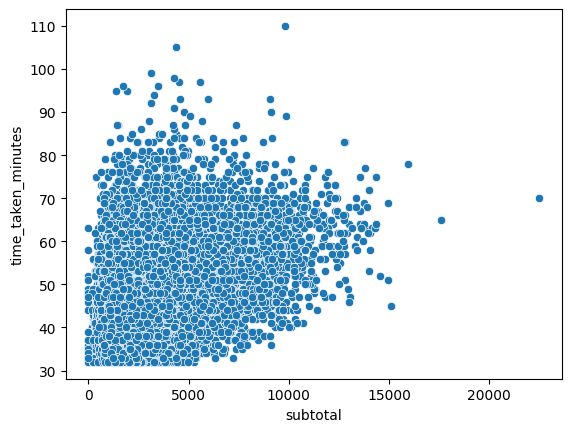

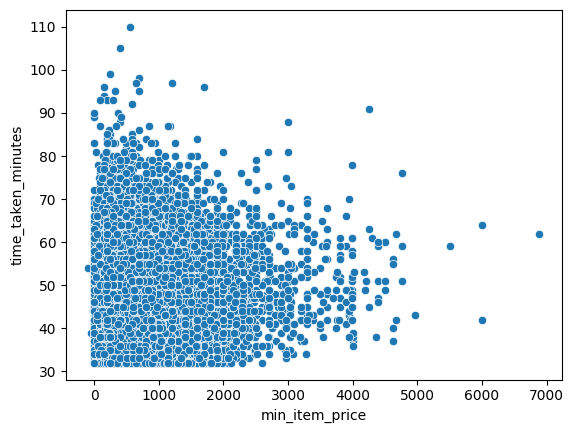

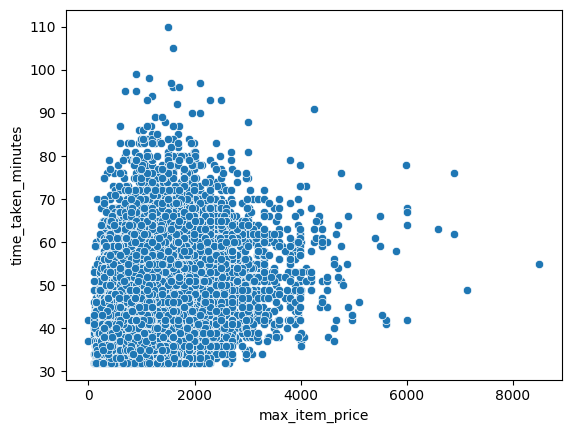

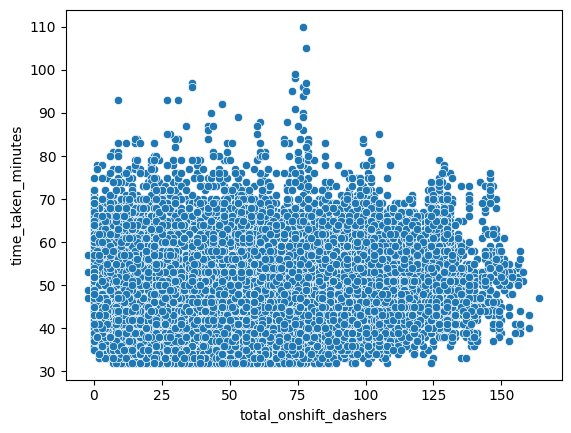

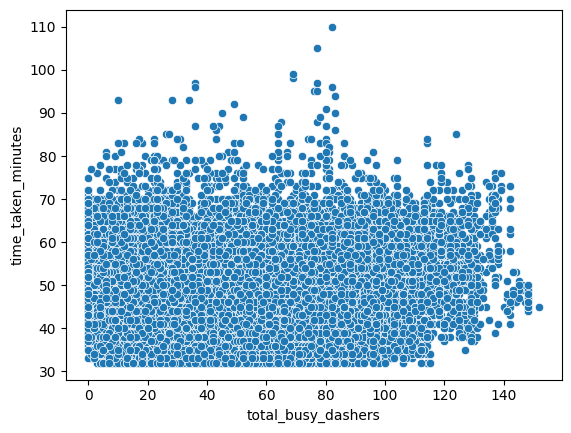

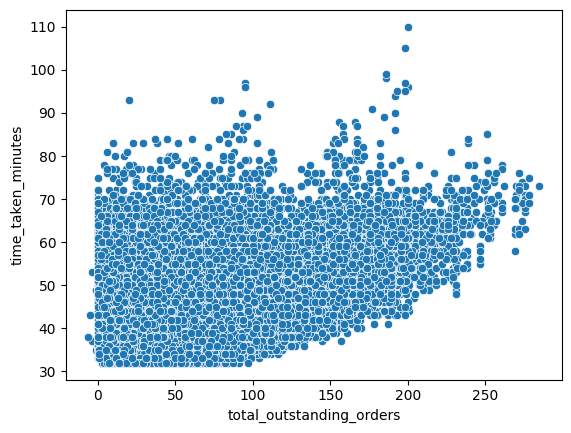

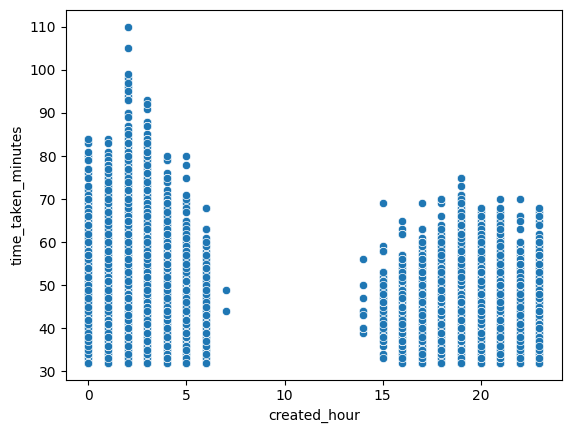

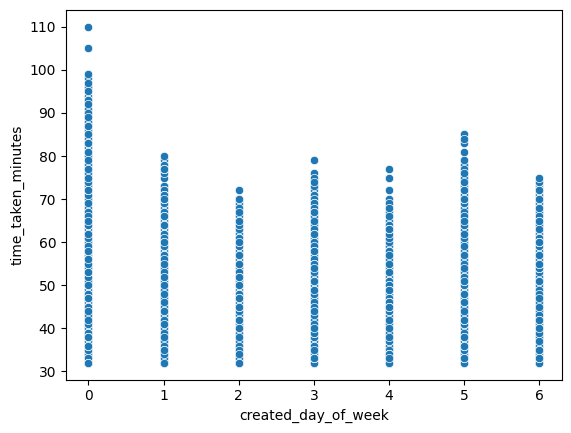

In [283]:
# Scatter plot to visualise the relationship between time_taken and other features

# Scatter plot - to compare numerical featrues with time take
for col in numerical_cols:
    sns.scatterplot(x=X_test[col], y=y_test)
    plt.show()

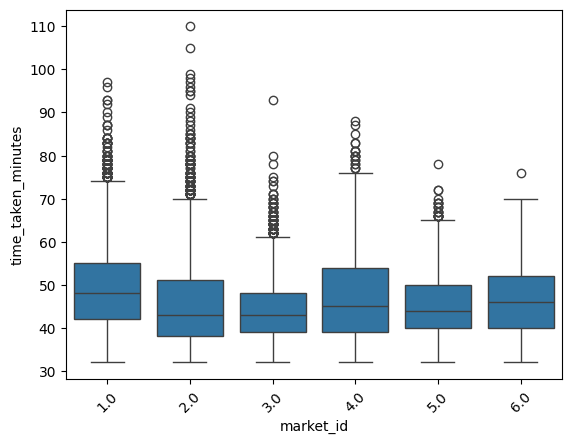

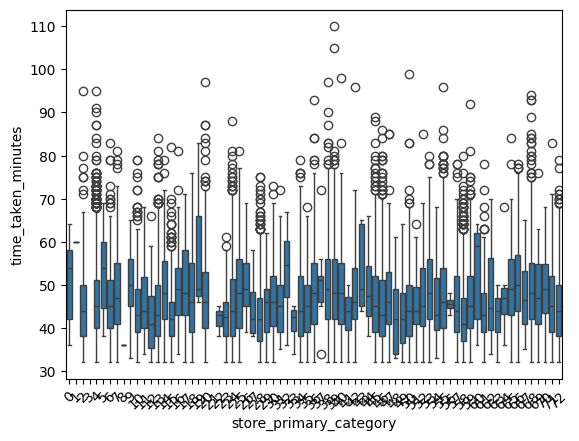

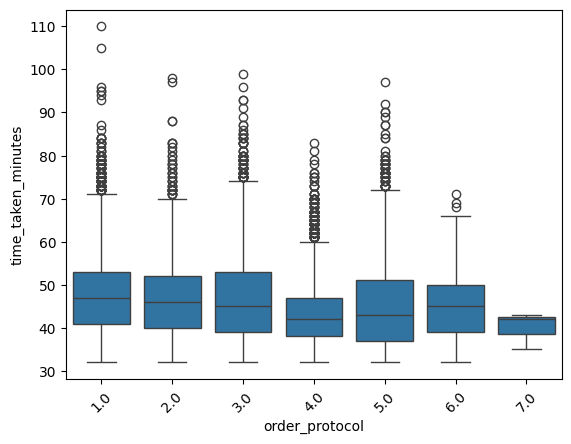

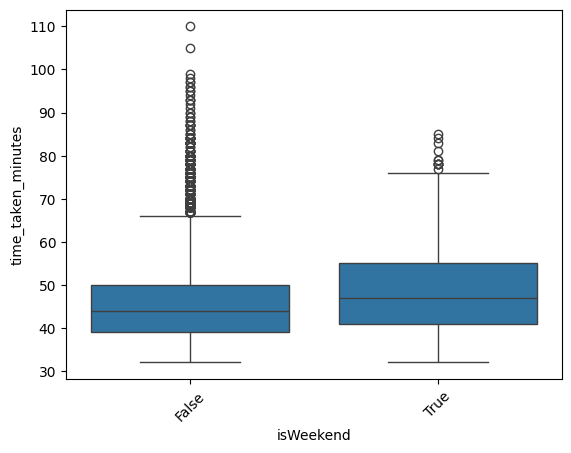

In [155]:
for col in categorical_cols:
    sns.boxplot(x=X_test[col], y=y_test)
    plt.xticks(rotation=45)
    plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [285]:
# Drop the weakly correlated columns from training dataset

# Drop 3-5 weakly correlated columns from training dataset

# Some columns are having very week correlation with target variable - Order protocol, MarketID, store primary category, min item price. 
# Some others are low as well but keeping those for now - in case it impacts other variables

#porterdf.drop(columns=["order_protocol", "market_id", "store_primary_category", "min_item_price"], inplace=True)
X_test.drop(columns=["order_protocol", "market_id", "store_primary_category", "min_item_price"], inplace=True)

categorical_cols = ["isWeekend"]

numerical_cols = ["total_items", "subtotal", "num_distinct_items", "max_item_price", "total_onshift_dashers", 
                  "total_busy_dashers", "total_outstanding_orders", "distance", "created_hour", "created_day_of_week"]



In [287]:
#Handle rest of the outliers by combining the logic

# All upper layer outliers should be removed after this

for col in numerical_cols:
    Q1 = X_test[col].quantile(0.25)
    Q3 = X_test[col].quantile(0.75)
    
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR

    print(X_test.shape)
    
    mask = (X_test[col] >= lower_bound) & (X_test[col] <= upper_bound)
    
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    print(X_test.shape)
    print(y_test.shape)

(35156, 11)
(33427, 11)
(33427,)
(33427, 11)
(32314, 11)
(32314,)
(32314, 11)
(32201, 11)
(32201,)
(32201, 11)
(31142, 11)
(31142,)
(31142, 11)
(30823, 11)
(30823,)
(30823, 11)
(30749, 11)
(30749,)
(30749, 11)
(29656, 11)
(29656,)
(29656, 11)
(29612, 11)
(29612,)
(29612, 11)
(29612, 11)
(29612,)
(29612, 11)
(29612, 11)
(29612,)


In [289]:
#Handle isWeekend categorical column

# Convert isWeekend from Boolean to Integer
X_test["isWeekend"] = X_test["isWeekend"].astype(int)

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [327]:
# Import libraries
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [293]:
# Apply scaling to the numerical columns

numerical_cols = ["total_items", "subtotal", "num_distinct_items", "max_item_price", "total_onshift_dashers", 
                  "total_busy_dashers", "total_outstanding_orders", "distance", "created_hour", "created_day_of_week"]

X_train[numerical_cols].head(100)

total_items  subtotal  num_distinct_items  max_item_price  \
42111             1      1350                   1            1350   
79735             3      3660                   3            1450   
80691             4       546                   4             249   
170910            1      1579                   1            1579   
64999             2      2150                   1             825   
...             ...       ...                 ...             ...   
69224             4      3200                   3            1100   
8462              2       775                   2             345   
69305             3      3503                   3            1875   
126371            1      1095                   1            1095   
96326             2      1906                   2            1370   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
42111                    23.0                20.0                      19.0   
79735                   127.0               106.0                     173.0   
80691                     1.0                 1.0                       0.0   
170910                    6.0                13.0                      21.0   
64999                    25.0                25.0                      28.0   
...                       ...                 ...                       ...   
69224                   108.0                78.0                     147.0   
8462                     16.0                15.0                      13.0   
69305                    34.0                34.0                      40.0   
126371                    6.0                 6.0                       8.0   
96326                    52.0                54.0                      61.0   

        distance  created_hour  created_day_of_week  
42111       9.60            20                    0  
79735      25.76             2                    5  
80691      25.80            14                    1  
170910      5.32             4                    0  
64999      29.56             2                    6  
...          ...           ...                  ...  
69224      17.60             1                    5  
8462       16.16            18                    5  
69305      13.20             0                    4  
126371      8.64            20                    1  
96326       9.44             1                    5  

[100 rows x 10 columns]

In [295]:
scaler = RobustScaler()

num_vars = ['total_items','created_day_of_week','subtotal','distance','created_hour','num_distinct_items','max_item_price','total_onshift_dashers','total_busy_dashers','total_outstanding_orders']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head() 

total_items  subtotal  num_distinct_items  max_item_price  \
42111          -0.5 -0.402886                -0.5        0.648703   
79735           0.5  0.986170                 0.5        0.848303   
80691           1.0 -0.886350                 1.0       -1.548902   
170910         -0.5 -0.265183                -0.5        1.105788   
64999           0.0  0.078172                -0.5       -0.399202   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
42111               -0.250000           -0.272727                 -0.300000   
79735                2.113636            1.681818                  2.266667   
80691               -0.750000           -0.704545                 -0.616667   
170910              -0.636364           -0.431818                 -0.266667   
64999               -0.204545           -0.159091                 -0.150000   

        distance  created_hour  created_day_of_week  isWeekend  
42111  -0.946708      0.941176                -0.75          0  
79735   0.319749     -0.117647                 0.50          1  
80691   0.322884      0.588235                -0.50          0  
170910 -1.282132      0.000000                -0.75          0  
64999   0.617555     -0.117647                 0.75          1

In [321]:
# Scale X_test set also to avoid issue during predictions and evaluation
scaler = RobustScaler()

num_vars = ['total_items','created_day_of_week','subtotal','distance','created_hour','num_distinct_items','max_item_price','total_onshift_dashers','total_busy_dashers','total_outstanding_orders']

X_test[num_vars] = scaler.fit_transform(X_test[num_vars])
X_test.head()

total_items  subtotal  num_distinct_items  max_item_price  \
139667          0.5 -0.435252                 0.0       -0.079208   
80077           0.0  0.556954                -0.5        0.376238   
41872          -0.5 -0.375300                -0.5        0.712871   
151215          0.5 -0.462230                 0.0       -1.257426   
31509           0.5 -0.434053                 0.0       -1.061386   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
139667               0.604651            0.651163                  0.406780   
80077               -0.348837           -0.325581                 -0.355932   
41872               -0.116279           -0.093023                  0.135593   
151215               0.139535           -0.023256                 -0.067797   
31509               -0.441860           -0.418605                 -0.440678   

        distance  created_hour  created_day_of_week  isWeekend  
139667 -0.090343     -0.058824                 0.25          0  
80077  -0.691589     -0.176471                 0.50          1  
41872  -0.383178     -0.058824                 0.00          0  
151215  0.389408      1.058824                 0.50          1  
31509  -0.931464     -0.058824                 0.75          1

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [299]:
# Align the indices
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [303]:
print(X_train.index)

RangeIndex(start=0, stop=118869, step=1)


In [307]:
# Create/Initialise the model
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm)


In [309]:
# Train the model using the training data
lr_model = lr.fit()

lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     time_taken_minutes   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 5.869e+04
Date:                Fri, 21 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:48:36   Log-Likelihood:            -3.1220e+05
No. Observations:              118869   AIC:                         6.244e+05
Df Residuals:                  118857   BIC:                         6.245e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       43.2938      0.018   2455.589      0.000      43.259      43.328
total_items                 -0.2227      0.033     -6.752      0.000      -0.287      -0.158
subtotal                     2.2613      0.026     85.885      0.000       2.210       2.313
num_distinct_items           1.1644      0.035     33.548      0.000       1.096       1.232
max_item_price               0.3950      0.019     20.966      0.000       0.358       0.432
total_onshift_dashers      -17.0438      0.047   -363.316      0.000     -17.136     -16.952
total_busy_dashers          -6.5522      0.047   -138.378      0.000      -6.645      -6.459
total_outstanding_orders    22.1116      0.040    546.890      0.000      22.032      22.191
distance                     6.1326      0.014    429.108      0.000       6.105       6.161
created_hour                -4.2081      0.020   -205.519      0.000      -4.248      -4.168
created_day_of_week         -0.3570      0.033    -10.943      0.000      -0.421      -0.293
isWeekend                    1.7062      0.035     48.182      0.000       1.637       1.776
==============================================================================
Omnibus:                    34322.934   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           125154.005
Skew:                           1.425   Prob(JB):                         0.00
Kurtosis:                       7.141   Cond. No.                         8.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [323]:
# Make predictions

X_test_const = sm.add_constant(X_test)

y_test_pred = lr_model.predict(X_test_const)

In [325]:
# Find results for evaluation metrics

r2_score(y_true = y_test, y_pred = y_test_pred)

0.842303698034021

In [329]:
mean_absolute_error(y_test, y_test_pred)

2.372439241563145

In [331]:
np.sqrt(mean_squared_error(y_test, y_test_pred))

3.3764760879161244

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [334]:
# Loop through the number of features and test the model

mylm = LinearRegression()
mylm.fit(X_train,y_train)

rfe = RFE(estimator=mylm, n_features_to_select=10)
rfe = rfe.fit(X_train,y_train)


In [336]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('total_items', False, 2),
 ('subtotal', True, 1),
 ('num_distinct_items', True, 1),
 ('max_item_price', True, 1),
 ('total_onshift_dashers', True, 1),
 ('total_busy_dashers', True, 1),
 ('total_outstanding_orders', True, 1),
 ('distance', True, 1),
 ('created_hour', True, 1),
 ('created_day_of_week', True, 1),
 ('isWeekend', True, 1)]

In [338]:
col = X_train.columns[rfe.support_]
col

Index(['subtotal', 'num_distinct_items', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'created_hour',
       'created_day_of_week', 'isWeekend'],
      dtype='object')

In [340]:
# Build the final model with selected number of features

X_train_rfe = X_train[col]

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     time_taken_minutes   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                 6.453e+04
Date:                Fri, 21 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:22:58   Log-Likelihood:            -3.1222e+05
No. Observations:              118869   AIC:                         6.245e+05
Df Residuals:                  118858   BIC:                         6.246e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       43.2560      0.017   2587.409      0.000      43.223      43.289
subtotal                     2.1770      0.023     93.881      0.000       2.132       2.222
num_distinct_items           0.9885      0.023     43.069      0.000       0.944       1.034
max_item_price               0.4552      0.017     27.408      0.000       0.423       0.488
total_onshift_dashers      -17.0451      0.047   -363.277      0.000     -17.137     -16.953
total_busy_dashers          -6.5530      0.047   -138.369      0.000      -6.646      -6.460
total_outstanding_orders    22.1139      0.040    546.864      0.000      22.035      22.193
distance                     6.1330      0.014    429.063      0.000       6.105       6.161
created_hour                -4.2074      0.020   -205.451      0.000      -4.248      -4.167
created_day_of_week         -0.3574      0.033    -10.954      0.000      -0.421      -0.293
isWeekend                    1.7056      0.035     48.155      0.000       1.636       1.775
==============================================================================
Omnibus:                    34330.747   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           125234.719
Skew:                           1.425   Prob(JB):                         0.00
Kurtosis:                       7.142   Cond. No.                         8.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

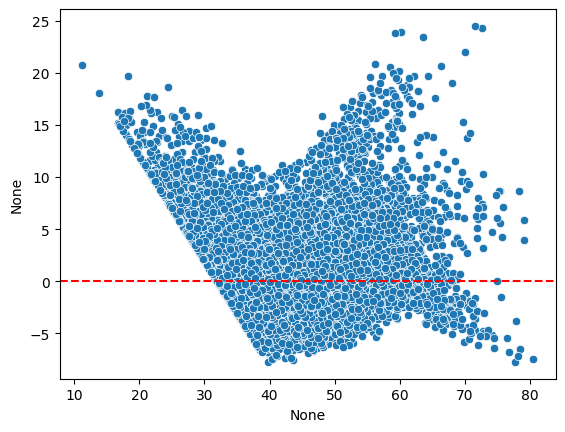

In [342]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

# Residual vs Predicted values
residuals = y_test - y_test_pred
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--') 
plt.show()
# Looks good to me, it is almost random distribution

In [346]:
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


# Compare the scaled vs unscaled features used in the final model

#Most of my features were scaled, except few here is how coffecients are looking. Only isWeekend was not scaled. 


subtotal (+2.1770)-  Higher order value increases delivery time.
num_distinct_items (+0.9885)-  More unique items in an order slightly increases delivery time.
max_item_price (+0.4552)- Expensive items increase delivery time, likely due to handling.
total_onshift_dashers (-17.0451)-  More dashers available significantly reduces delivery time.
total_busy_dashers (-6.5530)- More busy dashers also slightly reduce delivery time.
total_outstanding_orders (+22.1139)- More pending orders massively increase delivery time, biggest impact.
distance (+6.1330)- Longer distance leads to higher delivery time.
created_hour (-4.2074)- Later order times reduce delivery time.
created_day_of_week	(-0.3573) - Slight decrease in delivery time for certain weekdays.
isWeekend (+1.7056)- Weekends increase delivery time due to higher demand.

coef	std err	t	P>|t|	[0.025	0.975]
const	43.2560	0.017	2587.409	0.000	43.223	43.289
subtotal	2.1770	0.023	93.881	0.000	2.132	2.222
num_distinct_items	0.9885	0.023	43.069	0.000	0.944	1.034
max_item_price	0.4552	0.017	27.408	0.000	0.423	0.488
total_onshift_dashers	-17.0451	0.047	-363.277	0.000	-17.137	-16.953
total_busy_dashers	-6.5530	0.047	-138.369	0.000	-6.646	-6.460
total_outstanding_orders	22.1139	0.040	546.864	0.000	22.035	22.193
distance	6.1330	0.014	429.063	0.000	6.105	6.161
created_hour	-4.2074	0.020	-205.451	0.000	-4.248	-4.167
created_day_of_week	-0.3574	0.033	-10.954	0.000	-0.421	-0.293
isWeekend	1.7056	0.035	48.155	0.000	1.636	1.775



Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'

#total_outstanding_orders (+22.1139)- More pending orders massively increase delivery time, biggest impact.



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
> After looking at all the variables only one category left - isWeekend. From analysis perspective (+1.7056)- Weekends increase delivery time due to higher demand, so if it is weekend then delivery time would increase by 1.7 times. 



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>  It means 20% of the dataset will be used for testing, while 80% will be used for training



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> Distance is highly correlated to the time taken target variable.  



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

> Used box plots for each of the numerical variables and looked at the distuributions. Most of the numerical columns had outliers.Below code was used to find the items which are below the lower bound and above the uppper bound(most were above the upper bound). Running this code filtered out all the outliers (lower was not acutally needed)
>
> for col in numerical_cols:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR

    print(X_train.shape)
    
    mask = (X_train[col] >= lower_bound) & (X_train[col] <= upper_bound)
    
    X_train = X_train[mask]
    y_train = y_train[mask]
    
    print(X_train.shape)
    print(y_train.shape)



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>

Below three features significantly impacts the delivery time. 

total_onshift/busy_dashers (two are here - both negatively impacts)
total_outstanding_orde93
dista330
---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>



Linear regression is a method of finding the best straight line fitting to the given data, line finding the best linear relationship between the independent and dependent variables.
Technicallys, linear regression is a machine learning algorithm that finds the best linear-fit relationship on any given data, between independent and dependent variable

Assumptions,
Data features should not be realted to each other. 
There is  linear relationship between the dependent and independent variables.
Error terms are evenly distributed. 
d.

---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>


Simple linear regression is the  basic form of regression where we try to predict one output using one input feature. For example, to predict delivery time based on the distance, we can use simple linear regression. It fits a straight line through the dataa to show the relationhip between those two variable. Multiple linear regression uses two or more input features to make a prediction. So instead of just distance, you could also include the number of items, time of day or number of available dashers to predict delivery time. The key difference is that simple linear regression handles one input, while multiple linear regression can handle many inputse, making it useful when dealing with realworld data that depends on multiple features.
---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>



In linear regression cost function is like a scorecard. It tells us how bad/good our model is predictions are compared to the actual label values. Common cost function in linear regression is Mean Squaed Error (MSE), it calculates the average of the squared differences between the predicted values and the actual values. The goal of training the model is to make this number as small as possible.
---
We minimize it using optimization techniques like gradient descent to improve the model. In Gradient Desent we start with some random values for the model’s parameters, and then adjust them in small steps while looking at the model performance we try to achieve to the best parameters and corresponding weights. 
---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>

Overfitting is when model is too complex and it learns too much, including noise or deviations in the training data.
---

Underfitting happens when  model is too simple to capture the patterns in the data. It doesn’t learn enough from the training data.
---




##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**

Residual plots are useful to find out how well linear regression model is doing. A residual plot shows the residuals, the differences between actual and predicted values. In a fitting  model, the residuals should be randomly scattered. This randomness indicates that the model is capturing the relationship correctly. However if you see patterns it suggests problems. Residual plots helps in spotting outliers. Residual plots helps us to understand if it is working well or if it need improvement.
---